## 背景
在竞争激烈的市场环境下，企业必须不断优化自己的服务和产品，以满足不同用户的需求。预测用户是否会升级是一种非常重要的策略，可以帮助企业提前做好准备，并为潜在升级用户提供特别优惠和诱因，以提高成功升级的机会。此外，预测可以帮助企业优化资源分配，将更多精力和资源用于那些有较高潜力的用户身上，提高资源利用效率。通过提供个性化的服务和解决用户痛点，预测也能够增强用户的满意度和忠诚度。最重要的是，升级用户通常意味着更高的收益和利润。通过预测升级潜力，企业可以确定哪些用户有较高的升级潜力，从而加强与这些用户的关系，实现收益的增长。总之，预测用户是否会升级对企业来说是非常有必要的，可以帮助企业提前制定策略、优化资源分配、提高用户满意度和忠诚度，以及实现收益的增长。

## 数据
数据在 train.csv（训练集） 和 test.csv（测试集） 两个文件中，部分字段已脱敏处理。<br>

训练集：包含4000条数据，每行数据有20个字段，‘高价值倾向’为标签，其余字段为特征。<br>

|	|高价值倾向	|地区	|资费等级	|工作类型	|性别	|缴费方式	|收费方式	|Var1	|Var2	|Var3	|Var4	|Var5	|Var6	|Var7	|Var8	|Var9	|Var10	|Var11	|Var12	|Var13|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|0	|是	|北部	|中	|私企	|男	|现金	|预交	|0	|34.21	|1	|1522	|1131	|1071	|2	|1	|242	|44	|1121	|261	|49|
|1	|是	|中部	|中	|无业	|女	|现金	|预交	|0	|20.07	|1	|3058	|1256	|1180	|2	|2	|85	|45	|206	|94	|39|
|2	|是	|南部	|低	|国企	|女	|线上	|预交	|3	|20.27	|1	|16800	|1061	|1020	|1	|1	|182	|58	|429	|169	|49|
|3	|是	|中部	|低	|私企	|女	|现金	|预交	|3	|30.96	|1	|2348	|485	|441	|1	|1	|9	|34	|20	|6	|35|
|4	|是	|中部	|高	|私企	|男	|线上	|预交	|0	|52.77	|1	|4429	|550	|490	|2	|1	|376	|38	|932	|377	|53|

测试集：包含1000条数据，每行数据有19个字段，数据全部为特征。<br>

| |客户ID	|地区	|资费等级	|工作类型	|性别	|缴费方式	|收费方式	|Var1	|Var2	|Var3	|Var3	|Var5	|Var6	|Var7	|Var8	|Var9	|Var10	|Var11	|Var12	|Var13	|Var14|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|0	|4974	|北部	|低	|私企	|女	|线上	|预交	|3	|54.96	|2	|10209	|1130	|1045	|1	|1	|41	|41	|146	|65	|40	|NaN|
|1	|4975	|北部	|低	|私企	|男	|线上	|预交	|3	|34.19	|1	|9061	|1311	|1229	|1	|1	|98	|36	|-1	|-1	|-1	|NaN|
|2	|4976	|中部	|中	|无业	|女	|线上	|预交	|0	|22.55	|1	|2275	|253	|215	|2	|1	|15	|23	|33	|19	|26	|NaN|
|3	|4977	|北部	|高	|无业	|女	|线上	|预交	|3	|31.43	|1	|2650	|827	|793	|2	|2	|337	|101	|1194	|299	|117	|NaN|
|4	|4978	|北部	|低	|私企	|男	|现金	|预交	|3	|31.33	|2	|2585	|245	|180	|1	|2	|73	|34	|276	|72	|32|	NaN|

另外，给出了测试集前100条数据的标签(label.csv)，在输出测试集的预测标签后，在代码框执行'!python model_accuracy.py'查看前100条数据的预测准确率，进行辅助验证。

## 参考思路
1.数据探索。对数据大小、形状、数据类型、描述性统计量等进行查看，检查缺失值和重复值并对其做删除或填充处理。<br>
2.特征探索。对连续变量和离散变量分别进行探索，用图像展示和统计学推断等方式对数据做进一步的了解。<br>
3.特征工程。对连续喝离散变量分别进行编码、归一化和降维等操作。<br>
4.模型训练。查看单模型准确率。<br>
5.模型优化。对逻辑回归模型进行网格化调参。<br>
6.模型预测。训练自己的模型，并将对测试集标签的预测结果进行保存:<br>
  <font size=1 color=Red>①切勿删除测试集数据、打乱测试集顺序，输出测试集的预测标签时也切勿改变顺序。(测试数据数量和顺序均不可更改)</font><br>
  <font size=1 color=Red>②预测标签格式必须与示例格式相同，文件必须保存在 客户业务升级预测 文件夹下，名称为：pred_label.csv </font><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 数据探索

In [2]:
# 定义训练集和测试集的路径
train_path = './train.csv'
test_path = './test.csv'

# 从 CSV 文件中读取训练集和测试集数据，并将编码设置为 utf-8
train = pd.read_csv(train_path, encoding='utf-8') # 训练集
test = pd.read_csv(test_path, encoding='utf-8') # 测试集

# 打印训练集和测试集的前五行数据，以确保数据已经正确加载
print(train.head())
print(test.head())

   客户ID 高价值倾向  地区 资费等级 工作类型 性别 缴费方式 收费方式  Var1   Var2  ...  Var5  Var6  Var7  \
0  4107     否  中部    高   国企  男   线上   预交     3  52.76  ...   729   674     2   
1  4643     否  北部    高   私企  女   线上   预交     3  30.12  ...   844   815     1   
2  5793     否  南部    高   国企  男   现金   预交     0  51.59  ...  1378  1222     2   
3  3427     否  中部    高   私企  女   现金   预交     3  54.30  ...  1742  1702     1   
4  4068     否  中部    中   无业  女   现金   预交     3  50.41  ...   412   382     2   

   Var8  Var9  Var10  Var11  Var12  Var13  Var14  
0     1   145     49    409    150     57    NaN  
1     2   233     57    927    249     67    NaN  
2     2   262     89    669    261     73    NaN  
3     1   146     73    695     98     77    NaN  
4     1   530    120     -1     -1     -1    NaN  

[5 rows x 22 columns]
   客户ID  地区 资费等级 工作类型 性别 缴费方式 收费方式  Var1   Var2  Var3  ...  Var5  Var6  Var7  \
0  3849  北部    中   国企  女   线上   预交     0  33.52     2  ...   377   313     2   
1  2136  中部    中   私企  男   现金 

In [3]:
# 对训练集和测试集数据进行描述性统计分析，并打印结果
train.describe(), test.describe()

(              客户ID         Var1         Var2         Var3           Var4  \
 count  4000.000000  4000.000000  4000.000000  4000.000000    4000.000000   
 mean   3480.419750     1.500750    35.485318     1.487500    7554.144250   
 std    1446.922946     1.500187    12.428325     0.499906    7760.356273   
 min    1000.000000     0.000000    20.010000     1.000000       0.000000   
 25%    2219.500000     0.000000    23.767500     1.000000    2625.750000   
 50%    3483.500000     3.000000    32.320000     1.000000    5335.500000   
 75%    4721.250000     3.000000    50.960000     2.000000    9900.250000   
 max    5998.000000     3.000000   123.440000     2.000000  107547.000000   
 
               Var5          Var6         Var7         Var8         Var9  \
 count   4000.00000   4000.000000  4000.000000  4000.000000  4000.000000   
 mean    1015.55750    944.773750     1.517750     1.524250   174.954500   
 std      790.63149    780.873299     0.499747     0.499474   178.520392   
 

In [4]:
# 打印训练集和测试集数据的基本信息
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客户ID    4000 non-null   int64  
 1   高价值倾向   4000 non-null   object 
 2   地区      3979 non-null   object 
 3   资费等级    4000 non-null   object 
 4   工作类型    4000 non-null   object 
 5   性别      4000 non-null   object 
 6   缴费方式    4000 non-null   object 
 7   收费方式    4000 non-null   object 
 8   Var1    4000 non-null   int64  
 9   Var2    4000 non-null   float64
 10  Var3    4000 non-null   int64  
 11  Var4    4000 non-null   int64  
 12  Var5    4000 non-null   int64  
 13  Var6    4000 non-null   int64  
 14  Var7    4000 non-null   int64  
 15  Var8    4000 non-null   int64  
 16  Var9    4000 non-null   int64  
 17  Var10   4000 non-null   int64  
 18  Var11   4000 non-null   int64  
 19  Var12   4000 non-null   int64  
 20  Var13   4000 non-null   int64  
 21  Var14   671 non-null    float64
dtype

(None, None)

<font size=4 color=Blue>知识点1：Pandas缺失值、重复值的检验和处理</font><br>

In [5]:
# 计算训练集和测试集中每一列的缺失值数量
train_null = train.isnull().sum() # 训练集
test_null = test.isnull().sum() # 测试集

#print('训练集缺失值：\n{}\n\n测试集缺失值：\n{}'.format(train_null,test_null))
train_null, test_null

(客户ID        0
 高价值倾向       0
 地区         21
 资费等级        0
 工作类型        0
 性别          0
 缴费方式        0
 收费方式        0
 Var1        0
 Var2        0
 Var3        0
 Var4        0
 Var5        0
 Var6        0
 Var7        0
 Var8        0
 Var9        0
 Var10       0
 Var11       0
 Var12       0
 Var13       0
 Var14    3329
 dtype: int64,
 客户ID       0
 地区         4
 资费等级       0
 工作类型       0
 性别         0
 缴费方式       0
 收费方式       0
 Var1       0
 Var2       0
 Var3       0
 Var4       0
 Var5       0
 Var6       0
 Var7       0
 Var8       0
 Var9       0
 Var10      0
 Var11      0
 Var12      0
 Var13      0
 Var14    843
 dtype: int64)

In [6]:
# 计算训练集和测试集中的重复值数量
train_duplicate = train.duplicated().sum() #训练集
test_duplicate = test.duplicated().sum() # 测试集
#print('训练集重复值：\n{}\n\n测试集重复值：\n{}'.format(train_duplicate,test_duplicate))
train_duplicate, test_duplicate

(0, 0)

<font size=4 color=Blue>知识点2：Pandas的按列删除和缺失值填充操作</font><br>

In [7]:
def data_preprocess(data):
    # 删除 '客户ID' 和 'Var14' 列
    data.drop(columns=['客户ID', 'Var14'], inplace=True)
    
    # 使用前向填充方法填补缺失值
    data.fillna(method='ffill',inplace=True)
    # 提取训练集特征
    if '高价值倾向' in data.columns:
        # 如果数据集包含 '高价值倾向' 列，提取特征和标签
        feature = data.drop(columns=['高价值倾向'])
        label = data['高价值倾向']
        return feature, label
    # 提取测试集特征
    else:
        # 如果数据集不包含 '高价值倾向' 列，直接返回数据集
        return data
train_fea, train_lab = data_preprocess(train)
train_fea

,地区,资费等级,工作类型,性别,缴费方式,收费方式,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13
0,中部,高,国企,男,线上,预交,3,52.76,2,2727,729,674,2,1,145,49,409,150,57
1,北部,高,私企,女,线上,预交,3,30.12,2,8071,844,815,1,2,233,57,927,249,67
2,南部,高,国企,男,现金,预交,0,51.59,1,11307,1378,1222,2,2,262,89,669,261,73
3,中部,高,私企,女,现金,预交,3,54.30,2,23360,1742,1702,1,1,146,73,695,98,77
4,中部,中,无业,女,现金,预交,3,50.41,1,2598,412,382,2,1,530,120,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,南部,低,国企,男,线上,预交,3,21.43,2,7598,1216,1156,1,2,143,37,1004,221,53
3996,北部,高,国企,女,线上,预交,0,52.85,1,3757,523,431,2,1,213,50,476,203,50
3997,北部,低,私企,男,线上,预交,0,22.68,2,9472,971,907,2,2,4,20,36,7,20
3998,中部,高,无业,女,现金,预交,0,52.27,2,11676,750,694,1,1,97,10,377,108,10


In [8]:
test_fea = data_preprocess(test)
test_fea

,地区,资费等级,工作类型,性别,缴费方式,收费方式,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13
0,北部,中,国企,女,线上,预交,0,33.52,2,3813,377,313,2,2,41,10,147,45,10
1,中部,中,私企,男,现金,预交,0,50.82,2,3431,848,787,2,2,328,51,404,219,41
2,中部,高,私企,男,现金,预交,3,51.67,2,914,535,455,2,2,14,18,20,12,17
3,南部,低,私企,女,线上,预交,0,33.22,2,3734,576,507,2,1,148,53,377,132,49
4,南部,高,无业,男,现金,预交,3,50.41,2,5300,1206,1151,1,1,123,46,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,南部,高,私企,男,线上,预交,0,51.66,2,1988,460,385,2,2,488,133,1270,383,122
996,北部,低,国企,男,线上,预交,0,23.38,1,9940,1584,1537,2,2,229,45,815,233,50
997,中部,低,私企,男,线上,预交,3,31.04,1,204,386,320,2,1,71,47,223,59,47
998,南部,低,无业,男,线上,预交,3,51.11,1,21740,1425,1323,1,1,158,107,611,155,80


### 数据平衡

In [9]:
# 统计标签比例
train_lab.value_counts(normalize=True)

高价值倾向
否    0.86975
是    0.13025
Name: proportion, dtype: float64

<font size=4 color=Blue>知识点3：利用imblearn库对不平衡数据进行过（上）采样。</font><br>

### 上采样

In [11]:
# 导入 RandomOverSampler 模块
from imblearn.over_sampling import RandomOverSampler

# 创建 RandomOverSampler 实例，指定随机种子为 0
ros = RandomOverSampler(random_state=0)

# 使用 RandomOverSampler 对训练数据进行过采样，以处理类别不平衡问题
# train_fea 表示训练集特征，train_lab 表示训练集标签
train_fea, train_lab = ros.fit_resample(train_fea, train_lab)

# 统计过采样后的训练集标签值分布情况，输出结果（统计标签比例）
train_lab.value_counts(normalize=True)

高价值倾向
否    0.5
是    0.5
Name: proportion, dtype: float64

## 特征探索

In [12]:
# 类别特征和连续特征
cat = ['地区', '资费等级', '工作类型', '性别', '缴费方式', '收费方式','Var1','Var3', 'Var7', 'Var8', ]
num = ['Var2',  'Var4', 'Var5', 'Var6', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13']

### 连续变量

#### 数据分布

<font size=4 color=Blue>知识点4：核密度估计图和盒子图的绘制，多子图绘制。</font><br>

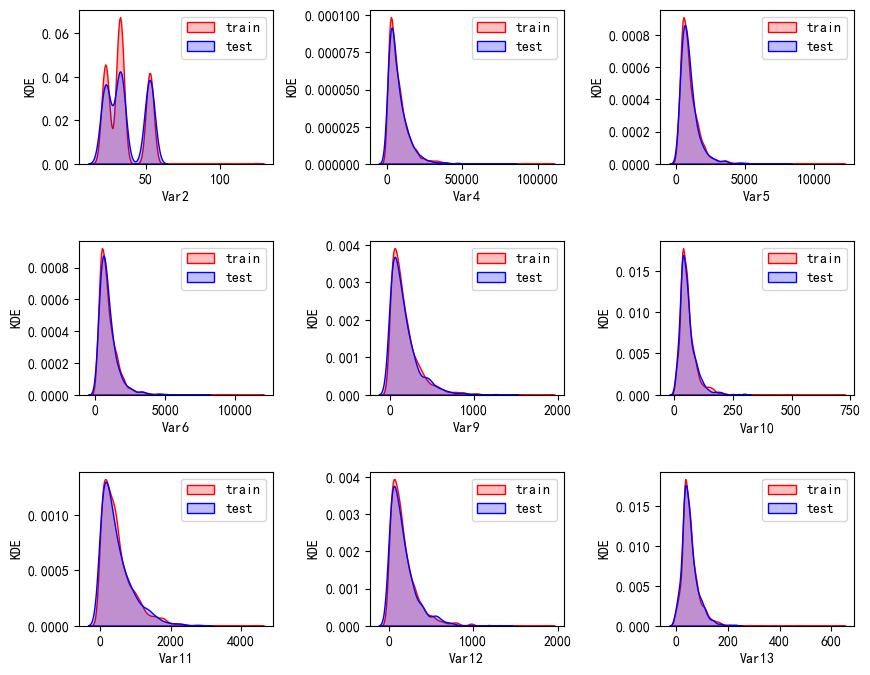

In [17]:
# 导入绘图库和 seaborn 库
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
fig = plt.figure(figsize=(10, 8))

# 遍历 num 列表的索引
for i in range(len(num)):
    # 在绘图窗口中创建一个子图，位置为 3x3 网格中的第 i+1 个位置
    ax = plt.subplot(3, 3, i+1)
    
    # 使用 seaborn 库核密度估计曲线，红色表示训练集，蓝色表示测试集
    ax = sns.kdeplot(train_fea[num[i]], color="Red", fill=True)
    ax = sns.kdeplot(test_fea[num[i]], color="Blue", fill=True)
    
    # 设置 x 轴标签为 num[i]
    ax.set_xlabel(num[i])
    
    # 设置 y 轴标签为 "KDE"
    ax.set_ylabel("KDE")
    
    # 设置图例为 ["train", "test"]
    ax = ax.legend(["train", "test"])
    
    # 调整子图之间的水平间距和垂直间距为 0.5
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 显示绘图窗口
plt.show()

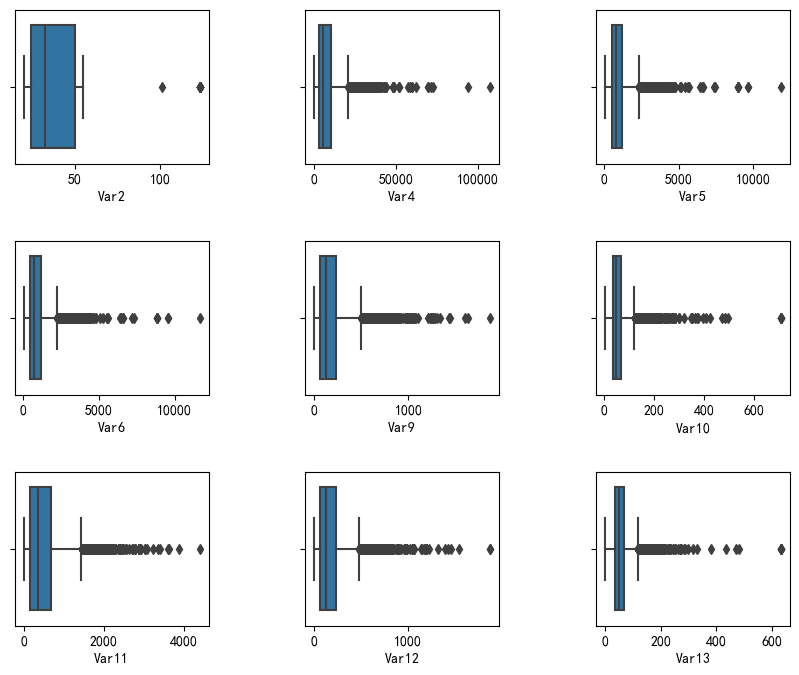

In [18]:
# 导入 seaborn 库
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
fig = plt.figure(figsize=(10, 8))

# 遍历 num 列表的索引
for i in range(len(num)):
    # 在绘图窗口中创建一个子图，位置为 3x3 网格中的第 i+1 个位置
    plt.subplot(3, 3, i+1)
    
    # 使用 seaborn 库绘制箱线图，x 轴为 train_fea[num[i]] 数据
    sns.boxplot(x=train_fea[num[i]])
    
    # 调整子图之间的水平间距和垂直间距为 0.5
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

# 显示绘图窗口
plt.show()

<font size=4 color=Blue>知识点5：利用Pandas库进行相关系数的计算；利用statsmodels库的方差膨胀因子进行多重共线性检验；利用sklearn的VarianceThreshold进行方差阈值检验。</font><br>

#### 相关性

<Axes: >

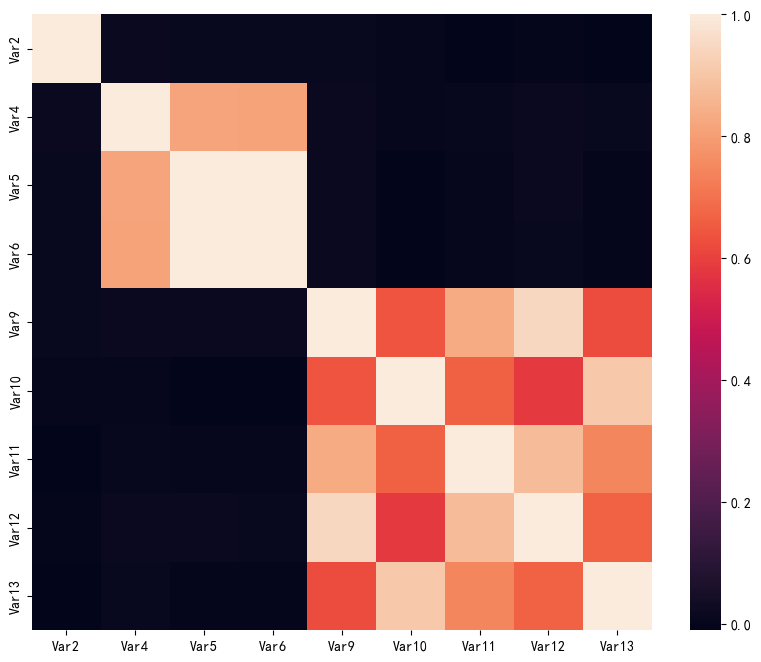

In [20]:
# 导入 seaborn 库
import seaborn as sns

# 创建一个大小为 10x8 的绘图窗口
plt.figure(figsize=(10, 8))

# 计算特征 num 的相关系数矩阵
corr = train_fea[num].corr()

# 使用 seaborn 库相关系数热力图
sns.heatmap(corr)

#### 多重共线性

In [21]:
# 从 statsmodels 库中的 outliers_influence 模块中导入方差膨胀因子函数
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 创建一个空的 DataFrame
vif = pd.DataFrame()

# 在 DataFrame 中创建一个名为 'index' 的列，并将特征 num 存入该列
vif['index'] = num

# 在 DataFrame 中创建一个名为 'VIF' 的列，计算各个特征的方差膨胀因子并存入该列
vif['VIF'] = [variance_inflation_factor(train_fea[num].values, i) for i in range(train_fea[num].shape[1])]

# 打印输出 DataFrame vif
print(vif)

   index         VIF
0   Var2    4.192730
1   Var4    6.051574
2   Var5  835.054862
3   Var6  784.412695
4   Var9   38.071325
5  Var10   30.744481
6  Var11   11.333633
7  Var12   43.509342
8  Var13   36.927079


#### 方差

In [22]:
# 从 sklearn 库中的 feature_selection 模块中导入方差阈值函数
from sklearn.feature_selection import VarianceThreshold

# 创建一个方差阈值对象，设定方差阈值为 0.0
vt = VarianceThreshold(threshold=0.0)

# 对特征 num 进行方差阈值处理
vt.fit_transform(train_fea[num])

# 获取被保留的特征名
fea_num = train_fea[num].columns[vt.get_support()]

# 获取每个特征的方差值
variance = vt.variances_[vt.get_support()]

# 创建一个 DataFrame，存储被保留的特征名和方差值
columns = ['feature', 'variance']
pd.DataFrame(np.vstack((fea_num, variance)).T, columns=columns)

,feature,variance
0,Var2,103.43
1,Var4,107547.0
2,Var5,11822.0
3,Var6,11623.0
4,Var9,1872.0
5,Var10,704.0
6,Var11,4409.0
7,Var12,1880.0
8,Var13,635.0


### 离散变量

<font size=4 color=Blue>知识点6：Seaborn库计数图的绘制，sklearn库卡方检验。</font><br>

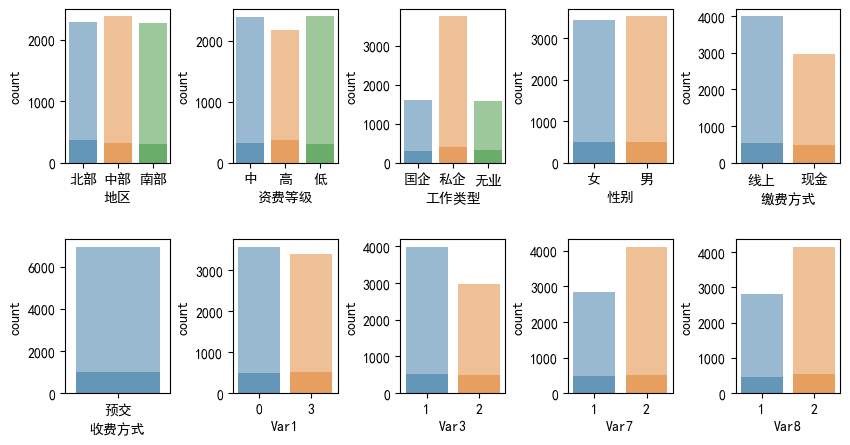

In [25]:
# 从 seaborn 库中导入 sns 并设置样式
import seaborn as sns

# 创建一个大小为 10x8 的图形对象
fig = plt.figure(figsize=(10, 8))

# 遍历 cat 列表中的每个元素
for i in range(len(cat)):
    # 在 2x5 的子图中的第 i+1 个位置创建子图
    plt.subplot(2, 5, i+1)
    
    # 绘制训练集中 cat[i] 特征的计数柱状图，并设置透明度为 0.5
    sns.countplot(x=cat[i], data=train_fea, alpha=0.5)
    
    # 绘制测试集中 cat[i] 特征的计数柱状图，并设置透明度为 0.5
    sns.countplot(x=cat[i], data=test_fea, alpha=0.5)
    
    # 调整子图之间的水平和垂直间距以及底部边距
    plt.subplots_adjust(wspace=0.6, hspace=0.5, bottom=0.4)
    
# 显示图形
plt.show()

#### 卡方分布

In [26]:
# 从 sklearn.feature_selection 库中导入 chi2 方法，用于特征选择
from sklearn.feature_selection import chi2

# 从 sklearn.preprocessing 库中导入 OrdinalEncoder，用于顺序编码
from sklearn.preprocessing import OrdinalEncoder

# 创建一个顺序编码器对象
ode = OrdinalEncoder()

# 使用顺序编码器对训练集中的分类变量进行编码，并将结果赋值给 chi_train_cat
chi_train_cat = ode.fit_transform(train_fea[cat])

# 使用 chi2 方法计算分类变量和目标变量之间的卡方统计量和 p 值
chi, p = chi2(chi_train_cat, train_lab)

# 创建一个 DataFrame，包含卡方统计量和 p 值
columns = ['卡方统计量', 'P值']
pd.DataFrame(np.vstack((chi, p)).T, columns=columns)

,卡方统计量,P值
0,2.701742,1.002387e-01
1,0.282466,5.950893e-01
2,442.205401,3.584830e-98
3,0.786504,3.751594e-01
4,61.332916,4.819551e-15
5,NaN,NaN
6,3.567217,5.893100e-02
7,111.709091,4.137810e-26
8,119.358999,8.739162e-28
9,110.061657,9.498976e-26


## 特征工程

In [27]:
# 按照特征探索重新选取新的特征
num = ['Var4', 'Var5', 'Var6', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13']
cat = ['地区', '资费等级', '工作类型', '性别', '缴费方式', 'Var1', 'Var3', 'Var7', 'Var8']

In [28]:
# 将数值特征和类别特征重新拼接
train_fea = train_fea[num + cat]
train_fea

,Var4,Var5,Var6,Var9,Var10,Var11,Var12,Var13,地区,资费等级,工作类型,性别,缴费方式,Var1,Var3,Var7,Var8
0,2727,729,674,145,49,409,150,57,中部,高,国企,男,线上,3,2,2,1
1,8071,844,815,233,57,927,249,67,北部,高,私企,女,线上,3,2,1,2
2,11307,1378,1222,262,89,669,261,73,南部,高,国企,男,现金,0,1,2,2
3,23360,1742,1702,146,73,695,98,77,中部,高,私企,女,现金,3,2,1,1
4,2598,412,382,530,120,-1,-1,-1,中部,中,无业,女,现金,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6953,12700,1265,1166,104,74,394,120,74,南部,中,私企,女,现金,0,2,2,2
6954,7469,485,438,26,45,72,25,45,南部,低,私企,男,线上,0,1,2,2
6955,28770,1627,1522,87,57,161,67,45,南部,低,私企,女,线上,0,1,2,2
6956,3602,632,572,59,35,167,74,34,中部,低,私企,女,现金,0,2,1,2


<font size=4 color=Blue>知识点7：标签编码、独热编码、最大-最小值归一化，PCA降维。</font><br>

#### PCA降维

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 创建一个 LabelEncoder 对象 le，并使用它对训练集中的目标变量进行编码
le = LabelEncoder()
train_lab = le.fit_transform(train_lab) # 训练转换

# 定义一个函数 fea_process，用于特征处理
def fea_process(data, train_fea):
    # 创建一个 OneHotEncoder 对象 ohe，并使用它对分类变量进行独热编码
    ohe = OneHotEncoder()
    ohe = ohe.fit(train_fea[cat]) # 对训练集做训练
    data_cat = ohe.transform(data[cat]) # 转换
    
    # 创建一个 MinMaxScaler 对象 Mm，并使用它对数值变量进行归一化
    Mm = MinMaxScaler()
    Mm = Mm.fit(train_fea[num]) # 对训练集做训练
    data_num = Mm.transform(data[num]) #转换

    # 创建一个 PCA 对象 pca，并使用它对数值变量进行主成分分析降维
    pca = PCA(n_components=0.999)
    pca.fit(train_fea[num]) # 对训练集做训练
    data_num = pca.transform(data[num]) # 转换
    
    # 拼接独热编码后的分类变量和主成分分析降维后的数值变量，得到最终的特征矩阵
    data_num_cat = np.concatenate((data_cat.toarray(), data_num),axis=1)
    
    return data_num_cat

In [30]:
train_num_cat = fea_process(train_fea, train_fea)
train_num_cat

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.76781451e+03,  2.04786353e+02, -8.36870998e+01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         5.60715680e+02, -2.53551975e+02,  4.27444937e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         3.85247955e+03,  3.09270910e+01,  2.13142301e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.12393300e+04, -1.62856650e+03, -4.01607155e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.91566095e+03, -3.32175497e+01, -3.57449534e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -5.28140752e+03,  4.22756092e+01, -4.92895935e+01]])

In [31]:
test_num_cat = fea_process(test_fea, train_fea)
test_num_cat

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -3.74892777e+03, -4.18303551e+02, -3.99350990e+02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.04929224e+03,  2.84078737e+02, -1.05735066e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.60290778e+03,  1.35728274e+02, -5.19119490e+02],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.33145056e+03,  1.59820862e+01, -3.03191809e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.42251418e+04, -1.09118823e+03,  7.04831161e+01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.00616025e+03,  6.22372375e+01, -3.75647638e+02]])

## 模型训练

<font size=4 color=Blue>知识点8：sklearn库中分类模型的调用，训练集和测试集的划分。</font><br>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver='saga', random_state=42)  # 创建逻辑回归模型对象
svc = SVC(random_state=42)  # 创建支持向量机模型对象
rfc = RandomForestClassifier(random_state=42)  # 创建随机森林分类器模型对象
knn = KNeighborsClassifier()  # 创建K近邻分类器模型对象
dt = DecisionTreeClassifier(random_state=42)  # 创建决策树分类器模型对象
mlp = MLPClassifier(max_iter=1000, random_state=42)  # 创建多层感知机分类器模型对象
gbdt = GradientBoostingClassifier(random_state=42)  # 创建梯度提升分类器模型对象
abdt = AdaBoostClassifier(random_state=42)  # 创建AdaBoost分类器模型对象

model_list = [lr, svc, knn, dt, mlp, rfc, gbdt, abdt]  # 将模型对象放入一个列表中
X_train, X_vaild, y_train, y_vaild = train_test_split(train_num_cat, train_lab, tra=0.8, random_state=42)  # 划分训练集和验证集数据，训练集比例80%

def sing_model(X_train, X_vaild, y_train, y_vaild):
    train_scores = []  # 记录训练集得分的列表
    valid_scores = []  # 记录验证集得分的列表

    for model in model_list:  # 遍历模型列表
        model = model.fit(X_train, y_train)  # 使用当前模型拟合训练集数据
        
        train_score = model.score(X_train, y_train)  # 计算训练集的准确率得分
        vaild_score = model.score(X_vaild, y_vaild)  # 计算验证集的准确率得分
        
        train_scores.append(train_score)  # 将训练集得分添加到列表中
        valid_scores.append(vaild_score)  # 将验证集得分添加到列表中
        
    return train_scores, valid_scores  # 返回训练集得分和验证集得分的列表

train_scores, valid_scores = sing_model(X_train, X_vaild, y_train, y_vaild)  # 调用函数获取训练集得分和验证集得分列表

/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


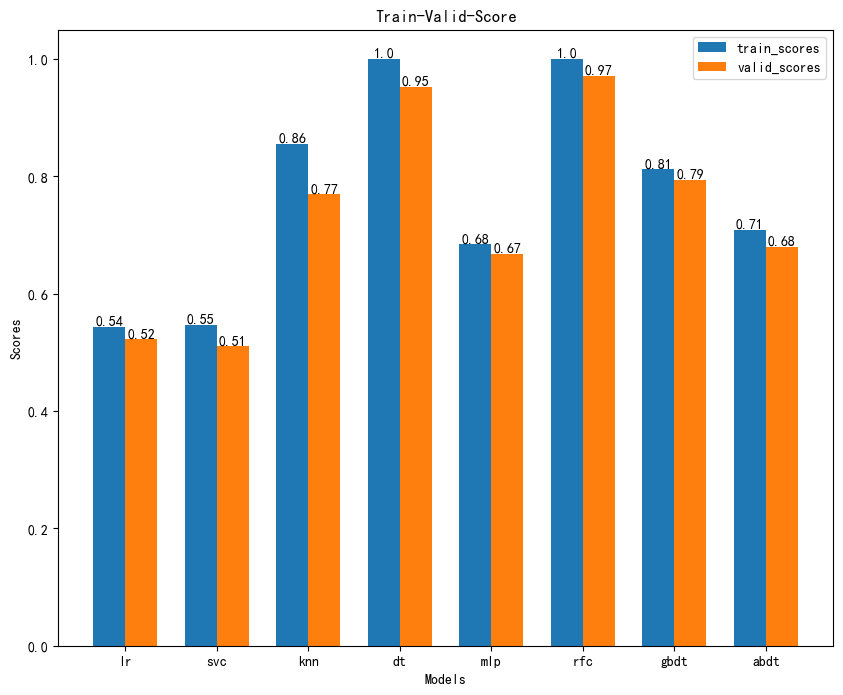

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 定义标签和得分数据
labels = ['lr', 'svc', 'knn', 'dt', 'mlp', 'rfc', 'gbdt', 'abdt']

# 创建一个大小为 10 x 8 的图形
plt.figure(figsize=(10,8))

# 设置每个柱状图的宽度
bar_width = 0.35

# 计算每个柱状图的中心位置
x = np.arange(len(labels))

# 绘制并列柱状图，train_scores 和 valid_scores 分别表示训练集和验证集的准确率
train_bars = plt.bar(x - bar_width/2, train_scores, bar_width, label='train_scores')
valid_bars = plt.bar(x + bar_width/2, valid_scores, bar_width, label='valid_scores')

# 在柱状图上添加数值标签，使用 round() 函数保留两位小数
for bar in train_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in valid_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 添加标签、标题和图例
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train-Valid-Score')
plt.xticks(x, labels)
plt.legend()

# 显示图形
plt.show()

## 特征优化

<font size=4 color=Blue>知识点9：网格化搜索调参。</font><br>

In [32]:
from sklearn.model_selection import GridSearchCV  # 导入网格搜索交叉验证函数

# 设置逻辑回归模型
lr = LogisticRegression(solver='liblinear', random_state=42)  # 创建逻辑回归模型对象，并指定求解器和随机种子

# 定义要搜索的参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的候选值
    'penalty': ['l1', 'l2']  # 惩罚项的候选值
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=4)  # 创建网格搜索交叉验证对象，使用5折交叉验证，准确率作为评分指标，4个线程并行运行

# 执行网格搜索
grid_search.fit(X_train, y_train)  # 在训练集上执行网格搜索

# 输出最佳参数和对应的准确率
print("Best parameters:", grid_search.best_params_)  # 输出最佳参数
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))  # 输出最佳参数对应的交叉验证准确率得分

# 使用最佳参数在测试集上评估模型性能
best_model = grid_search.best_estimator_  # 获取最佳模型
test_score = best_model.score(X_vaild, y_vaild)  # 在验证集上评估最佳模型的性能
print("Test set score with best parameters: {:.2f}".format(test_score))  # 输出在验证集上使用最佳参数得到的准确率得分

Best parameters: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation score: 0.68
Test set score with best parameters: 0.66


<font size=4 color=Blue>知识点10：模型最终得分。</font><br>

## 以下为标签保存示例

<font size=3 color=Blue>将your_model替换为自己的模型即可。</font><br>

test_pred = your_model.predict(test_num_cat) <br>
test_pred = le.inverse_transform(test_pred) <br>
test_pred = pd.DataFrame(test_pred, columns=['label']) <br>
test_pred.to_csv('pred_label.csv', index=False) <br>

<font size=3 color=Blue>若处理方式与示例不同，则参考 label.csv 文件的格式进行保存，label.csv 部分数据如下：</font><br>

| | label|
|--|--|
|1|否|
|2|否|
|3|否|
|4|否|
|5|否|

In [43]:
'''
# 示例
# 如果你选取逻辑回归模型，
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)

# 那么将你训练好的模型 your_model 替换为 lr即可
test_pred = lr.predict(test_num_cat)
test_pred = le.inverse_transform(test_pred) 
test_pred = pd.DataFrame(test_pred, columns=['label']) 
test_pred.to_csv('pred_label.csv', index=False) 
'''

In [ ]:
!python model_accuracy.py